# Part A Solutions Notebook

Required packages are imported using the below code:

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as pyplot

## Question 1

We read the image as an "image object". To be able to apply matrix operations on it we convert it to a numpy array.

With the ".shape" function we can see that it has dimensions (512\*512\*3).

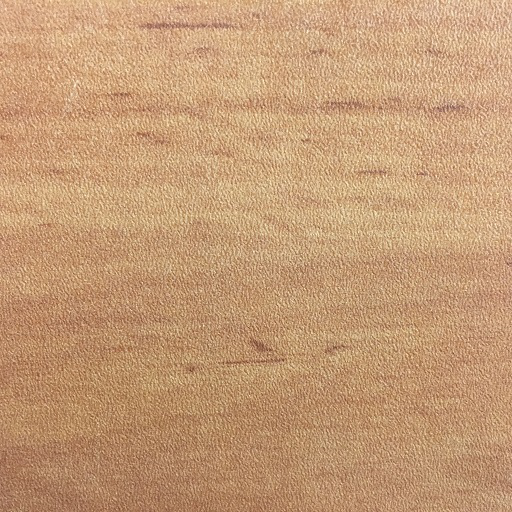

In [2]:
img  = Image.open("surfacePic.jpg")
img

In [3]:
pix = np.array(img)

In [4]:
pix

array([[[218, 173, 140],
        [216, 172, 137],
        [205, 161, 126],
        ...,
        [196, 157, 124],
        [233, 195, 159],
        [232, 192, 157]],

       [[241, 196, 163],
        [229, 184, 151],
        [211, 167, 132],
        ...,
        [208, 169, 136],
        [231, 193, 157],
        [226, 186, 151]],

       [[232, 189, 155],
        [244, 199, 166],
        [196, 151, 118],
        ...,
        [226, 187, 154],
        [221, 180, 148],
        [231, 191, 156]],

       ...,

       [[198, 153, 124],
        [179, 134, 105],
        [182, 137, 108],
        ...,
        [187, 147, 112],
        [173, 133,  98],
        [179, 139, 104]],

       [[161, 116,  87],
        [175, 130, 101],
        [186, 141, 112],
        ...,
        [182, 142, 107],
        [211, 171, 136],
        [162, 122,  87]],

       [[172, 127,  96],
        [170, 125,  96],
        [158, 113,  84],
        ...,
        [182, 142, 107],
        [184, 144, 109],
        [197, 157, 122]]

## Question 2

Structure of our variable is a *three dimensional array*.

Dimension of our variable is 512x512x3 which is 786432.

In [5]:
pix.shape

(512, 512, 3)

### Question 2.a
Image can be displayed from its pixels array using below code:

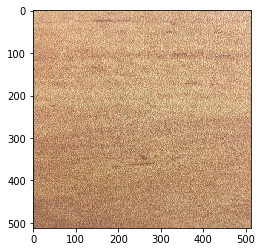

In [6]:
pyplot.imshow(pix)
pyplot.show()

### Question 2.b
Each channel can be displayed by setting other channels' pixel values to zero. 

They are displayed as three subplots using below codes:

In [7]:
R=np.copy(pix)
R[:,:,1:]=0

In [8]:
G=np.copy(pix)
G[:,:,[0,2]]=0

In [9]:
B=np.copy(pix)
B[:,:,[0,1]]=0

In [10]:
def plot_channels(R_channel, G_channel, B_channel, title_text="Channel"):
    pyplot.subplot(1,3,1, title="Red "+title_text)
    pyplot.imshow(R_channel)
    pyplot.subplot(1,3,2, title="Green "+title_text)
    pyplot.imshow(G_channel)
    pyplot.subplot(1,3,3, title="Blue "+title_text)
    pyplot.imshow(B_channel)
    pyplot.tight_layout()
    pyplot.show()

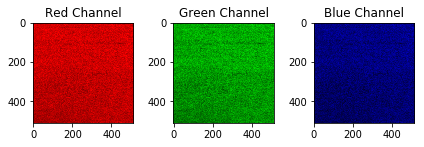

In [11]:
plot_channels(R,G,B)

## Question 3

We take the column average of each channel by excluding other channels' pixel values and setting the axis value of mean function to 0 for each channel. After that operation we end up with the plot below.

In [12]:
R_avg = R[:,:,0].mean(0)
G_avg = G[:,:,1].mean(0)
B_avg = B[:,:,2].mean(0)

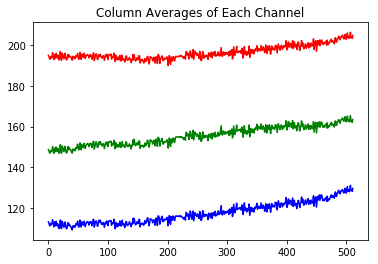

In [13]:
pyplot.plot(range(0,512), R_avg, color="red")
pyplot.plot(range(0,512), G_avg, color="green")
pyplot.plot(range(0,512), B_avg, color="blue")
pyplot.title("Column Averages of Each Channel")
pyplot.show()

## Question 4

We substracted the above half from the below half and vice-versa.

These two halves become the negative images of each other since (A-B) = -(B-A). So they don't give us any new information. However we thought that displaying both together might reveal some other aspect of the image that was harder to see from single half. 

In [14]:
R_diff1 = R[0:256]-R[256:512]
R_diff2 = R[256:512]-R[0:256]
R_diff = np.concatenate([R_diff1,R_diff2])
G_diff1 = G[0:256]-G[256:512]
G_diff2 = G[256:512]-G[0:256]
G_diff = np.concatenate([G_diff1,G_diff2])
B_diff1 = B[0:256]-B[256:512]
B_diff2 = B[256:512]-B[0:256]
B_diff = np.concatenate([B_diff1,B_diff2])

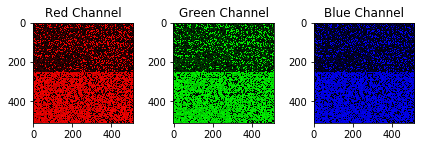

In [15]:
plot_channels(R_diff,G_diff,B_diff)

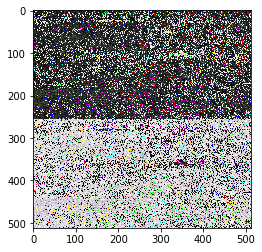

In [16]:
pix_diff1 = pix[0:256]-pix[256:512]
pix_diff2 = pix[256:512]-pix[0:256]
pix_diff = np.concatenate((pix_diff1,pix_diff2))
pyplot.imshow(pix_diff)
pyplot.show()

## Question 5

To perform median filtering, firstly three functions are defined, namely plot_channels, median_filter and median_filter_all. plot_channels returns the images of three channels of the original picture. median_filter returns the median filtered version of a given two dimensional matrix using the window sizes as an input. Lastly, median_filter_all returns the median filtered versions of all three channels of an image and their combination, that is the overall median filtered image.   

In [17]:
def median_filter(matr,dim):
    medfil=np.zeros(matr.shape, dtype='int32')
    length=int(dim/2)
    for i in range(512):
        for j in range(512):
            medfil[i,j]= np.median(matr[max(0,i-length):min(512,i+length+1),max(0,j-length):min(512,j+length+1)], axis=(0,1))
    return medfil

In [18]:
def median_filter_all(pix_matr, dim):
    med_pix = median_filter(pix, dim)
    med_R = np.zeros(med_pix.shape, dtype='int32')
    med_G = np.zeros(med_pix.shape, dtype='int32')
    med_B = np.zeros(med_pix.shape, dtype='int32')
    med_R[:,:,0] = np.copy(med_pix[:,:,0])
    med_G[:,:,1] = np.copy(med_pix[:,:,1])
    med_B[:,:,2] = np.copy(med_pix[:,:,2])
    return med_pix, med_R, med_G, med_B

### Question 5.a

By applying median filtering to the surface image with 5 to 5 windows the following images are obtained. They are clearly smoother and unclearer than the original versions.

In [19]:
pix_5, R_5, G_5, B_5 = median_filter_all(pix, 5)

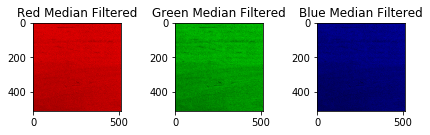

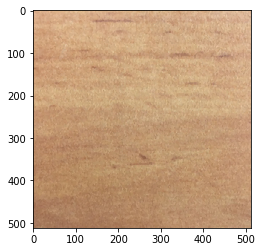

In [20]:
pix_5, R_5, G_5, B_5 = median_filter_all(pix, 5)

plot_channels(R_5, G_5, B_5, "Median Filtered")
pyplot.imshow(pix_5)
pyplot.show()

### Question 5.b

Similarly, 11 to 11 window size median filtering is applied below. The smoothing effect is higher for the new window size, making most of the small details invisible. 

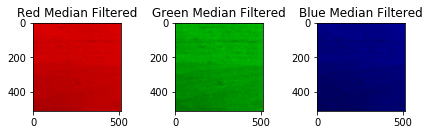

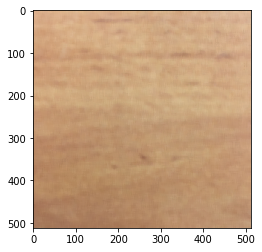

In [21]:
pix_11, R_11, G_11, B_11 = median_filter_all(pix, 11)

plot_channels(R_11, G_11, B_11, "Median Filtered")
pyplot.imshow(pix_11)
pyplot.show()

### Question 5.c

For 31 to 31 window size, median filtering makes the picture highly unclear and merely significant color changes can be seen. 

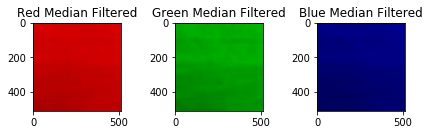

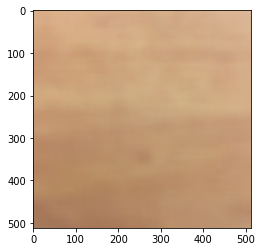

In [22]:
pix_31, R_31, G_31, B_31 = median_filter_all(pix, 31)

plot_channels(R_31, G_31, B_31, "Median Filtered")
pyplot.imshow(pix_31)
pyplot.show()

Higher window size results in smoother filtered pictures, since the sequence that provides the median value happens to change less and gives closer medians. Despite better noise reduction, the highly smoothed data leads to unclear pictures, which indicates a trade-off between noise reduction and clearence.

> **NOTE:** The source code is available at [here](https://github.com/BU-IE-582/fall19-akinelden/blob/master/Project_Part1/Part1_A.ipynb) 